In [4]:
import glob
import eigsep_observing.io as io
import numpy as np
import os
from datetime import datetime, timezone
from zoneinfo import ZoneInfo
import h5py
import json
import matplotlib.pyplot as plt

In [2]:
def read_header(fname, keys=None):
    with h5py.File(fname, "r") as f:
        # header
        header_grp = f["header"]
        header = {k: v for k, v in header_grp.attrs.items() if keys is None or k in keys}
        for name, obj in header_grp.items():
            if keys is not None and name not in keys:
                continue
            if isinstance(obj, h5py.Group):
                header[name] = {k: v for k, v in obj.attrs.items()}
            else:
                header[name] = json.loads(obj[()])
    return header

mtn_tzone = ZoneInfo("America/Denver")

def unix_time_to_local(unix_times):
    local_times = np.array([datetime.fromtimestamp(ts, tz=timezone.utc).astimezone(mtn_tzone) for ts in unix_times])
    return local_times

dtype_r = np.float32
dtype_c = np.complex64

In [ ]:
PATH = '/media/aparsons/AD67-8B62/marjum-2025-07/corr_data'
DATE_THRESH = 1735689600
if True:
    hdr = None
    files = sorted(glob.glob(os.path.join(PATH, '*.h5')))
    times = []
    acc_cnt = []
    for f in files:
        try:
            _hdr = read_header(f, {'times', 'acc_cnt'})
            times.append(_hdr['times'])
            acc_cnt.append(_hdr['acc_cnt'])
            if hdr is None:
                hdr = read_header(f)
        except(KeyError,OSError):
            print(f)
            pass
    
    times = np.concatenate(times)
    t_valid = np.where(times > DATE_THRESH)
    local_times = unix_time_to_local(times)
    freqs = np.asarray(hdr['freqs'])

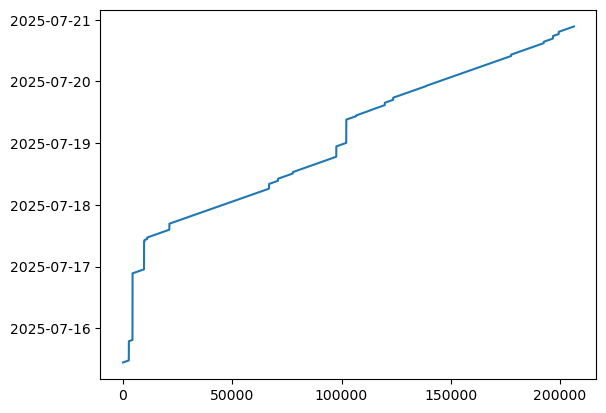

In [5]:
plt.figure()
plt.plot(local_times[t_valid])

In [8]:
npz_file = 'all_ant_%s.npz'
#keys = {'0', '1', '3', '5', '24', '02', '04', '13', '15', '35'}
keys = {'15', '35'}
ntimes = times.size
nfreqs = freqs.size
if True:
    for k in keys:
        data = {k: np.empty((ntimes, nfreqs), dtype=dtype_r) if len(k) == 1 else np.empty((ntimes, nfreqs), dtype=dtype_c)}
        i = 0
        for f in files:
            print(k, f)
            dat, hdr, meta = io.read_hdf5(f)
            nt = len(hdr['times'])
            times[i:i+nt] = hdr['times']
            data[k][i:i+nt] = dat[k]
            i += nt
        np.savez(npz_file % k, times=times[t_valid], local_times=local_times[t_valid], freqs=freqs, **{k: v[t_valid] for k,v in data.items()})

35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_094746.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_095204.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_095622.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_100041.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_100459.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_100916.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_101335.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_101754.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_102211.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_102629.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_103046.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250715_180258.h5
35 /media/aparsons/AD67-8B62/marjum-2025-07/corr_data/corr_20250